In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display
from scipy.io.wavfile import write
import glob, pickle
import numpy as np
import soundfile as sf
from scipy.io import wavfile
from scipy import signal

In [2]:
note_class = [
    ['Closed_Hihat'],
    ['Bass', 'Closed_Hihat'],
    ['Opened_Hihat'],
    ['Snare', 'Closed_Hihat'],
    ['Snare', 'Opened_Hihat'],
    ['Bass', 'Opened_Hihat'],
    ['Bass'],
    ['Snare'],
    ['Ride'],
    ['Bass', 'Ride'],
    ['Snare', 'Ride'],
    ['Bass', 'Crash'],
    'rest',
    ['Mid_Tom'],
    ['Mid_Tom'],
    ['Snare', 'Bass', 'Closed_Hihat'],
    ['Floor_Tom'],
    ['Snare', 'Floor_Tom'],
    ['Snare', 'Bass'],
    ['Snare', 'Crash'],
    ['Snare', 'Bass', 'Ride'],
    ['Bass', 'Floor_Tom'],
    ['Snare', 'Bass', 'Opened_Hihat'],
    ['Mid_Tom', 'Floor_Tom'],
    ['Mid_Tom', 'Floor_Tom']]

In [3]:
stem_notes_1 = []
stem_notes_2 = []
stem_notes_3 = []
stem_notes_4 = []

beats_1 = []
beats_2 = []
beats_3 = []
beats_4 = []

for j in note_class:
    for k in range(4):
        stem_notes_1.append(j)
    for k in range(8):
        stem_notes_2.append(j)
    for k in range(2):
        stem_notes_3.append(j)
        for l in range(3):
            stem_notes_3.append('rest')
    for k in range(4):
        beats_1.append(['1/4'])
    for k in range(8):
        beats_2.append(['1/8'])
        beats_3.append(['1/8'])
    
copy_note = note_class.copy()

del copy_note[0]
for i in note_class:
    for j in copy_note:
        for k in range(4):
            stem_notes_4.append(i)
            stem_notes_4.append(j)
        for k in range(8):
            beats_4.append(['1/8'])
    if copy_note == []:
        break
    del copy_note[0]

In [4]:
# real_drum, real_drum_3db
music, sr = librosa.load('G:/2021/KIST/1.code/Python/real_drum_more.wav')

In [5]:
tempo = 120 # temp 변경
one_stem = 60/tempo*4*sr
print(one_stem)

scale_time_range = 60/160/2
scale_range = 60/160/2*sr
scale_range = int(scale_range)

44100.0


In [6]:
n_stem = round(len(music)/one_stem)

stem_music = []
flag = 0

for i in range(n_stem):
    if i%2 == 0:
        music_crop_per_stem = music[round(flag):round(flag+one_stem)]
        flag += one_stem*2
        stem_music.append(music_crop_per_stem)

In [7]:
stem_music_1 = stem_music[0:25]
stem_music_2 = stem_music[25:50]
stem_music_3 = stem_music[50:75]
stem_music_4 = stem_music[75:375]

In [8]:
crop_music_1 = []
crop_music_2 = []
crop_music_3 = []
crop_music_4 = []

for i in stem_music_1:
    c_m_1 = i[0:len(i)//4]
    c_m_1 = c_m_1[0:scale_range]
    crop_music_1.append(c_m_1)
    c_m_2 = i[len(i)//4:len(i)//4*2]
    c_m_2 = c_m_2[0:scale_range]
    crop_music_1.append(c_m_2)
    c_m_3 = i[len(i)//4*2:len(i)//4*3]
    c_m_3 = c_m_3[0:scale_range]
    crop_music_1.append(c_m_3)
    c_m_4 = i[len(i)//4*3:-1]
    c_m_4 = c_m_4[0:scale_range]
    crop_music_1.append(c_m_4)
for i in stem_music_2:
    c_m_1 = i[0:len(i)//8]
    c_m_1 = c_m_1[0:scale_range]
    crop_music_2.append(c_m_1)
    c_m_2 = i[len(i)//8:len(i)//8*2]
    c_m_2 = c_m_2[0:scale_range]
    crop_music_2.append(c_m_2)
    c_m_3 = i[len(i)//8*2:len(i)//8*3]
    c_m_3 = c_m_3[0:scale_range]
    crop_music_2.append(c_m_3)
    c_m_4 = i[len(i)//8*3:len(i)//8*4]
    c_m_4 = c_m_4[0:scale_range]
    crop_music_2.append(c_m_4)
    c_m_5 = i[len(i)//8*4:len(i)//8*5]
    c_m_5 = c_m_5[0:scale_range]
    crop_music_2.append(c_m_5)
    c_m_6 = i[len(i)//8*5:len(i)//8*6]
    c_m_6 = c_m_6[0:scale_range]
    crop_music_2.append(c_m_6)
    c_m_7 = i[len(i)//8*6:len(i)//8*7]
    c_m_7 = c_m_7[0:scale_range]
    crop_music_2.append(c_m_7)
    c_m_8 = i[len(i)//8*7:-1]
    c_m_8 = c_m_8[0:scale_range]
    crop_music_2.append(c_m_8)
for i in stem_music_3:
    c_m_1 = i[0:len(i)//8]
    c_m_1 = c_m_1[0:scale_range]
    crop_music_3.append(c_m_1)
    c_m_2 = i[len(i)//8:len(i)//8*2]
    c_m_2 = c_m_2[0:scale_range]
    crop_music_3.append(c_m_2)
    c_m_3 = i[len(i)//8*2:len(i)//8*3]
    c_m_3 = c_m_3[0:scale_range]
    crop_music_3.append(c_m_3)
    c_m_4 = i[len(i)//8*3:len(i)//8*4]
    c_m_4 = c_m_4[0:scale_range]
    crop_music_3.append(c_m_4)
    c_m_5 = i[len(i)//8*4:len(i)//8*5]
    c_m_5 = c_m_5[0:scale_range]
    crop_music_3.append(c_m_5)
    c_m_6 = i[len(i)//8*5:len(i)//8*6]
    c_m_6 = c_m_6[0:scale_range]
    crop_music_3.append(c_m_6)
    c_m_7 = i[len(i)//8*6:len(i)//8*7]
    c_m_7 = c_m_7[0:scale_range]
    crop_music_3.append(c_m_7)
    c_m_8 = i[len(i)//8*7:-1]
    c_m_8 = c_m_8[0:scale_range]
    crop_music_3.append(c_m_8)
for i in stem_music_4:
    c_m_1 = i[0:len(i)//8]
    crop_music_4.append(c_m_1)
    c_m_2 = i[len(i)//8:len(i)//8*2]
    crop_music_4.append(c_m_2)
    c_m_3 = i[len(i)//8*2:len(i)//8*3]
    crop_music_4.append(c_m_3)
    c_m_4 = i[len(i)//8*3:len(i)//8*4]
    crop_music_4.append(c_m_4)
    c_m_5 = i[len(i)//8*4:len(i)//8*5]
    crop_music_4.append(c_m_5)
    c_m_6 = i[len(i)//8*5:len(i)//8*6]
    crop_music_4.append(c_m_6)
    c_m_7 = i[len(i)//8*6:len(i)//8*7]
    crop_music_4.append(c_m_7)
    c_m_8 = i[len(i)//8*7:-1]
    crop_music_4.append(c_m_8)

In [9]:
music_crops_per_beat = crop_music_4
notes = stem_notes_4

In [10]:
n_1 = 140
n_2 = 150
test_music_crop = music_crops_per_beat[n_1:n_2]
test_notes = notes[n_1:n_2]

In [11]:
test_notes

[['Closed_Hihat'],
 ['Snare', 'Bass'],
 ['Closed_Hihat'],
 ['Snare', 'Bass'],
 ['Closed_Hihat'],
 ['Snare', 'Crash'],
 ['Closed_Hihat'],
 ['Snare', 'Crash'],
 ['Closed_Hihat'],
 ['Snare', 'Crash']]

(-0.7, 0.7)

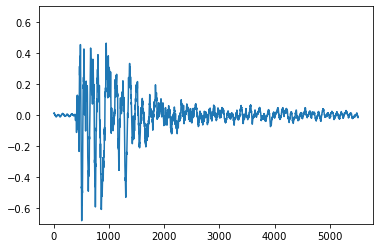

In [630]:
sample = test_music_crop[1]
plt.plot(sample)
plt.ylim(-0.7,0.7)

In [587]:
def m_Jitter(X, sigma):
    myNoise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X+myNoise
#sigma = np.random.uniform(low=0, high=0.02)

(-0.7, 0.7)

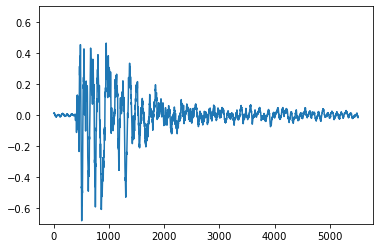

In [434]:
sigma = np.random.uniform(low=0, high=0.02)
aa = m_Jitter(sample,sigma)
plt.plot(aa)
plt.ylim(-0.7,0.7)

In [599]:
def m_Scaling(X, sigma):
    scalingFactor = np.random.normal(loc=0, scale=sigma, size=(1,X.shape[1]))
    myNoise = np.matmul(np.ones((X.shape[0],1)), scalingFactor)
    return X*myNoise
#sigma = np.random.uniform(low=0.9, high=1.1)
#sample = np.expand_dims(sample,axis=1)

[[0.81735975]
 [0.81735975]
 [0.81735975]
 ...
 [0.81735975]
 [0.81735975]
 [0.81735975]]


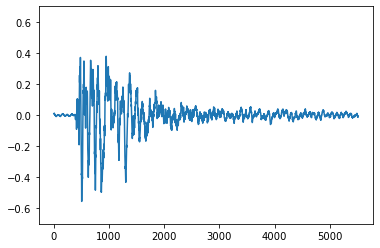

In [623]:
sigma = np.random.uniform(low=0.9, high=1.1)
aa = m_Scaling(sample,sigma)
plt.plot(aa)
plt.ylim(-0.7,0.7)
print(n)

In [629]:
from scipy.ndimage.interpolation import shift

In [631]:
def m_Shifting(X, shift_inv):
    fill_time_noise = np.random.normal(loc=0, scale=0.003, size=abs(shift_inv))

    shift_sample = shift(sample, shift_inv, cval=np.nan)
    where_nan = np.isnan(shift_sample)

    shift_sample[where_nan] = fill_time_noise
    return shift_sample
#shift_inv = np.random.randint(-300,1000)

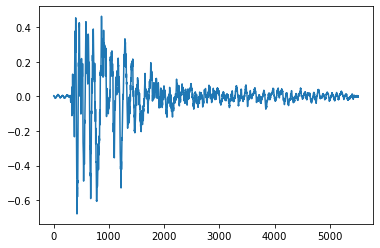

In [638]:
shift_inv = np.random.randint(-300,1000)
aa = m_Shifting(sample,shift_inv)
plt.plot(aa)

(0.0, 100.0)

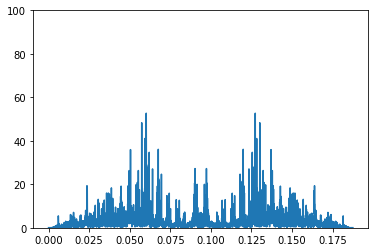

In [326]:
from scipy.fftpack import fft,fftshift

y = fftshift(abs(fft(sample)))
x = np.linspace(0,scale_time_range,len(sample))

plt.plot(x,y)
plt.ylim(0,100)

(-0.7, 0.7)

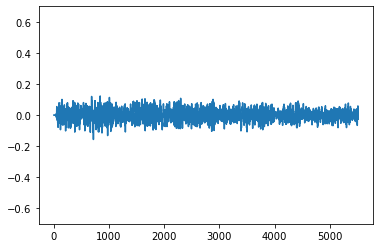

In [339]:
from scipy.io import wavfile
from scipy import signal
b = signal.firwin(101, cutoff=3500, fs=sr, pass_zero='lowpass')
bb = signal.lfilter(b,[1.0], sample)
plt.plot(bb)
plt.ylim(-0.7,0.7)                     

In [ ]:
import numpy as np
sample_1 = (sample-min(sample))/(max(sample)-min(sample))
plt.plot(sample_1)
print(min(sample_1))
plt.ylim(0,1)

In [16]:
S = librosa.feature.melspectrogram(sample,sr,n_fft=512)

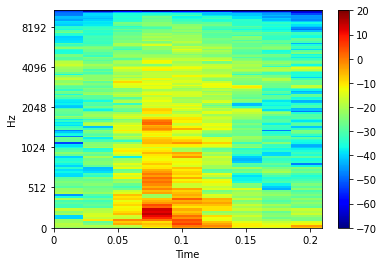

In [19]:
S_dB = librosa.power_to_db(S)
img = librosa.display.specshow(S_dB, cmap='jet', x_axis='time', y_axis='mel', sr=sr)
plt.colorbar()
plt.clim(-70,20)

In [197]:
stft_sample = np.abs(librosa.stft(sample))

cqt_sample = np.abs(librosa.cqt(sample))

C:\Users\ADmin\anaconda3\envs\new_torch\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=256 is too small for input signal of length=130
  n_fft, y.shape[-1]
C:\Users\ADmin\anaconda3\envs\new_torch\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=256 is too small for input signal of length=65
  n_fft, y.shape[-1]


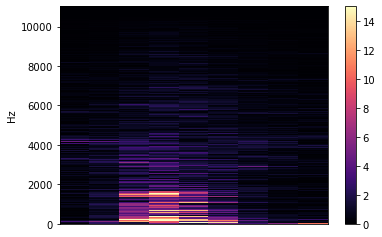

In [198]:
librosa.display.specshow(stft_sample, y_axis='linear')
plt.colorbar()
plt.clim(0,15)

C:\Users\ADmin\anaconda3\envs\new_torch\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


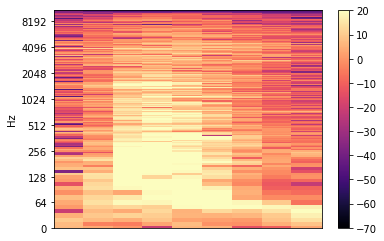

In [199]:
librosa.display.specshow(librosa.amplitude_to_db(stft_sample), cmap='magma', y_axis='log')
plt.colorbar()
plt.clim(-70,20)

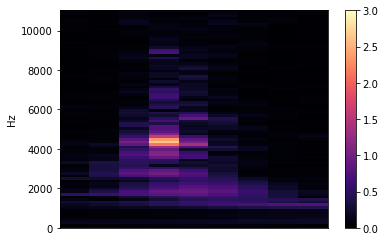

In [200]:
librosa.display.specshow(cqt_sample, y_axis='linear')
plt.colorbar()
plt.clim(0,3)

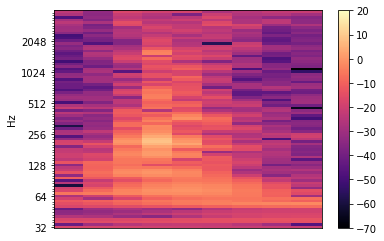

In [205]:
librosa.display.specshow(librosa.amplitude_to_db(cqt_sample), cmap='magma', y_axis='cqt_hz')
plt.colorbar()
plt.clim(-70,20)